# 365 Learning Data Challenge

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import imblearn

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn import svm

from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

## Import Tables

In [2]:
course_info = pd.read_csv('365_database/365_course_info.csv')

course_ratings = pd.read_csv('365_database/365_course_ratings.csv')

exam_info = pd.read_csv('365_database/365_exam_info.csv')

quiz_info = pd.read_csv('365_database/365_quiz_info.csv')

student_engagement = pd.read_csv('365_database/365_student_engagement.csv')

student_exams = pd.read_csv('365_database/365_student_exams.csv')

student_hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')

student_info = pd.read_csv('365_database/365_student_info.csv')

student_learning = pd.read_csv('365_database/365_student_learning.csv')

student_purchases = pd.read_csv('365_database/365_student_purchases.csv')

student_quizzes = pd.read_csv('365_database/365_student_quizzes.csv')

## Examine the Table Summaries

In [3]:
course_info.head()

,course_id,course_title
0,2,Introduction to Tableau
1,3,The Complete Data Visualization Course with Py...
2,4,Introduction to R Programming
3,5,Data Preprocessing with NumPy
4,7,Introduction to Data and Data Science


In [4]:
course_ratings.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [5]:
exam_info.head()

,exam_id,exam_category,exam_duration
0,118,2,14
1,119,2,14
2,120,1,26
3,276,2,15
4,277,2,15


In [6]:
quiz_info.head()

,quiz_id,question_id,answer_id,answer_correct
0,1,1,1,n
1,1,1,2,y
2,1,1,3,n
3,1,1,4,n
4,2,2,5,n


In [7]:
student_engagement.head()

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27


In [8]:
student_exams.head()

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
0,173311,258803,475,83,5.17,2022-01-01
1,173332,258815,380,0,10.02,2022-01-01
2,173333,258815,380,67,7.93,2022-01-01
3,173335,258815,380,100,0.60,2022-01-01
4,173336,258815,380,0,10.02,2022-01-01


In [9]:
student_hub_questions.head()

,hub_question_id,student_id,date_question_asked
0,7619,258803,2022-01-03
1,7630,258803,2022-01-04
2,7662,259342,2022-01-05
3,7667,259391,2022-01-05
4,7668,259174,2022-01-05


In [10]:
student_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [11]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [12]:
student_purchases.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [13]:
student_quizzes.head()

,student_id,quiz_id,question_id,answer_id
0,258803,537,796,3139.0
1,258803,159,793,3127.0
2,258803,159,794,3132.0
3,258803,160,181,710.0
4,258803,161,184,723.0


The examination shows that the tables 'course_info', 'exams_info', 'quiz_info', 'student_hub_questions' and 'student_quizzes' contain information irrelavant for estimating the 'paid' status of a student. They will not be taken into consideration in the remainder of the code. The other tables may or may not be used accordingly.

## Merge Relevant Tables

TODO: Boolean engagement values shall be added using student_engagement table.

In [14]:
df = pd.merge(student_learning, student_purchases, how='outer', on='student_id') \
       .merge(student_info, how='left', on='student_id') \
       .merge(course_ratings, how='left', on=['student_id', 'course_id'])

In [15]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,purchase_type,date_purchased,student_country,date_registered,course_rating,date_rated
0,258798,23.0,0.3,2022-01-01,NaN,NaN,NaN,IN,2022-01-01,NaN,NaN
1,258800,2.0,12.9,2022-04-01,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
2,258800,7.0,46.8,2022-01-03,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
3,258800,7.0,4.3,2022-01-04,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
4,258800,7.0,31.7,2022-01-07,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN


In [16]:
df.shape

(87774, 11)

In [17]:
df['purchase_type'].unique()

array([nan, 'Annual', 'Monthly', 'Quarterly'], dtype=object)

Create the Boolean target variable 'paid_subscriber'. As long as 'purchase_type' is not NAN, this value will be positive.

In [18]:
df['paid_subscriber']=df['purchase_type']
df.loc[(df['paid_subscriber']=='Annual') | (df['paid_subscriber']=='Monthly') | (df['paid_subscriber']=='Quarterly'),'paid_subscriber'] = 1
df.loc[np.isnan(list(np.array(df['paid_subscriber']))) ,'paid_subscriber'] = 0
df=df.drop(['purchase_type'],axis=1)
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,date_purchased,student_country,date_registered,course_rating,date_rated,paid_subscriber
0,258798,23.0,0.3,2022-01-01,NaN,NaN,IN,2022-01-01,NaN,NaN,0
1,258800,2.0,12.9,2022-04-01,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,258800,7.0,46.8,2022-01-03,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,258800,7.0,4.3,2022-01-04,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,258800,7.0,31.7,2022-01-07,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [19]:
df=df.drop(['student_id','purchase_id'],axis=1)
df.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,paid_subscriber
0,23.0,0.3,2022-01-01,NaN,IN,2022-01-01,NaN,NaN,0
1,2.0,12.9,2022-04-01,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,7.0,46.8,2022-01-03,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,7.0,4.3,2022-01-04,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,7.0,31.7,2022-01-07,2022-01-01,CA,2022-01-01,NaN,NaN,1


# Impute Missing Values

In [20]:
df.isna().sum()

course_id            141
minutes_watched      141
date_watched         141
date_purchased     27204
student_country       44
date_registered        0
course_rating      71195
date_rated         71195
paid_subscriber        0
dtype: int64

In [21]:
# Instead of filling the missing date values with the most frequent value, fill them with a date that is for sure happened 
# before the given event which is date_registered column. Otherwise, some date difference become negative which does not make 
# much sense.

df['date_purchased'].fillna(df['date_registered'], inplace=True)
df['date_rated'].fillna(df['date_registered'], inplace=True)
df.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,paid_subscriber
0,23.0,0.3,2022-01-01,2022-01-01,IN,2022-01-01,NaN,2022-01-01,0
1,2.0,12.9,2022-04-01,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1
2,7.0,46.8,2022-01-03,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1
3,7.0,4.3,2022-01-04,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1
4,7.0,31.7,2022-01-07,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1


In [22]:
X = df.drop(['paid_subscriber'], axis=1)
y = df['paid_subscriber']
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

In [23]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fit = imputer.fit_transform(X_train)
X_train = pd.DataFrame(data = fit, columns=imputer.feature_names_in_)
X_test  = pd.DataFrame(data = imputer.transform(X_test), columns=imputer.feature_names_in_)


X_train.head()


,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated
0,23.0,50.7,2022-03-25,2022-09-05,CA,2022-03-04,5.0,2022-03-04
1,52.0,9.6,2022-06-06,2022-09-15,BR,2022-02-14,5.0,2022-02-14
2,21.0,0.2,2022-07-06,2022-07-05,DO,2022-07-05,5.0,2022-07-05
3,16.0,31.3,2022-08-15,2022-06-25,MD,2022-06-25,5.0,2022-06-25
4,45.0,0.5,2022-08-06,2022-08-06,US,2022-08-06,5.0,2022-08-06


In [24]:
X_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
date_purchased     0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

## Create New Columns

Create some new columns by taking differences of dates compared to registration date.

In [25]:
X_train['days_watched_after_reg'] = (pd.to_datetime(X_train['date_watched']) - pd.to_datetime(X_train['date_registered'])).dt.days
X_train['days_purchased_after_reg'] = (pd.to_datetime(X_train['date_purchased']) - pd.to_datetime(X_train['date_registered'])).dt.days
X_train['days_rated_after_reg'] = (pd.to_datetime(X_train['date_rated']) - pd.to_datetime(X_train['date_registered'])).dt.days

X_test['days_watched_after_reg'] = (pd.to_datetime(X_test['date_watched']) - pd.to_datetime(X_test['date_registered'])).dt.days
X_test['days_purchased_after_reg'] = (pd.to_datetime(X_test['date_purchased']) - pd.to_datetime(X_test['date_registered'])).dt.days
X_test['days_rated_after_reg'] = (pd.to_datetime(X_test['date_rated']) - pd.to_datetime(X_test['date_registered'])).dt.days

X_train.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg
0,23.0,50.7,2022-03-25,2022-09-05,CA,2022-03-04,5.0,2022-03-04,21,185,0
1,52.0,9.6,2022-06-06,2022-09-15,BR,2022-02-14,5.0,2022-02-14,112,213,0
2,21.0,0.2,2022-07-06,2022-07-05,DO,2022-07-05,5.0,2022-07-05,1,0,0
3,16.0,31.3,2022-08-15,2022-06-25,MD,2022-06-25,5.0,2022-06-25,51,0,0
4,45.0,0.5,2022-08-06,2022-08-06,US,2022-08-06,5.0,2022-08-06,0,0,0


Drop columns that became unnecessary after creation of the previous ones.

In [26]:
X_train=X_train.drop(['date_watched','date_purchased','date_rated','date_registered'],axis=1)
X_test=X_test.drop(['date_watched','date_purchased','date_rated','date_registered'],axis=1)

X_train.head()

,course_id,minutes_watched,student_country,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg
0,23.0,50.7,CA,5.0,21,185,0
1,52.0,9.6,BR,5.0,112,213,0
2,21.0,0.2,DO,5.0,1,0,0
3,16.0,31.3,MD,5.0,51,0,0
4,45.0,0.5,US,5.0,0,0,0


In [27]:
X_train['course_id'].unique()

array([23.0, 52.0, 21.0, 16.0, 45.0, 53.0, 39.0, 14.0, 7.0, 37.0, 24.0,
       32.0, 3.0, 20.0, 42.0, 29.0, 13.0, 35.0, 46.0, 2.0, 12.0, 11.0,
       4.0, 25.0, 5.0, 22.0, 41.0, 15.0, 33.0, 50.0, 51.0, 28.0, 49.0,
       30.0, 26.0, 27.0, 19.0, 54.0, 67.0, 43.0, 34.0, 55.0, 36.0, 44.0,
       48.0, 56.0, 66.0, 57.0, 59.0, 65.0], dtype=object)

## One Hot Encoding

Two variables are categorical in nature at this point. These are 'course_id' and 'student_country'. They are one-hot encoded here.

In [28]:
course_id_onehot=pd.get_dummies(X_train['course_id'],prefix='course_id')

In [29]:
X_train_len=X_train.shape[0]
X_concat=pd.concat([X_train,X_test],ignore_index = True, sort = False)

course_id_onehot=pd.get_dummies(X_concat['course_id'],prefix='course_id')
X_concat = X_concat.join(course_id_onehot)
student_country_onehot=pd.get_dummies(X_concat['student_country'],prefix='student_country')
X_concat = X_concat.join(student_country_onehot)

X_concat = X_concat.drop(['course_id','student_country'],axis=1)

X_concat.head()

,minutes_watched,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg,course_id_2.0,course_id_3.0,course_id_4.0,course_id_5.0,course_id_7.0,...,student_country_UZ,student_country_VC,student_country_VE,student_country_VN,student_country_VU,student_country_XK,student_country_YE,student_country_ZA,student_country_ZM,student_country_ZW
0,50.7,5.0,21,185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.6,5.0,112,213,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.2,5.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31.3,5.0,51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.5,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train = X_concat[:X_train_len]
X_test = X_concat[X_train_len:]

In [31]:
X_train.columns

Index(['minutes_watched', 'course_rating', 'days_watched_after_reg',
       'days_purchased_after_reg', 'days_rated_after_reg', 'course_id_2.0',
       'course_id_3.0', 'course_id_4.0', 'course_id_5.0', 'course_id_7.0',
       ...
       'student_country_UZ', 'student_country_VC', 'student_country_VE',
       'student_country_VN', 'student_country_VU', 'student_country_XK',
       'student_country_YE', 'student_country_ZA', 'student_country_ZM',
       'student_country_ZW'],
      dtype='object', length=228)

##  Scaling columns

In order to bring values in each column close to each other scaling should be applied. For features that inherently have finite minimum/maximum values, min-max scaling is applied. For features with infinite range standard scaling (subtract the mean and divde by standard deviation) is applied.

In [32]:
columns_minmax = ['course_rating']
columns_standard = ['minutes_watched','days_watched_after_reg', 'days_purchased_after_reg', 'days_rated_after_reg']

TODO: Below code snippet works but gives a "SettingWithCopyWarning". Fix this later.

In [33]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X_train[columns_minmax] = minmax_scaler.fit_transform(X_train[columns_minmax])
X_train[columns_standard] = standard_scaler.fit_transform(X_train[columns_standard])
#X_train = pd.DataFrame(X_train, columns=list(X_train.columns))

X_test[columns_minmax] = minmax_scaler.transform(X_test[columns_minmax])
X_test[columns_standard] = standard_scaler.transform(X_test[columns_standard])
#X_test = pd.DataFrame(X_test, columns=scaler.feature_names_in_)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [34]:
X_train.head()

,minutes_watched,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg,course_id_2.0,course_id_3.0,course_id_4.0,course_id_5.0,course_id_7.0,...,student_country_UZ,student_country_VC,student_country_VE,student_country_VN,student_country_VU,student_country_XK,student_country_YE,student_country_ZA,student_country_ZM,student_country_ZW
0,0.471232,1.0,-0.460610,2.921229,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.530708,1.0,1.028146,3.445436,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.759863,1.0,-0.787809,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.001703,1.0,0.030189,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.752549,1.0,-0.804169,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Balancing Training Set

In [35]:
over_sampler=RandomOverSampler(random_state=365)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)
under_sampler=RandomUnderSampler(random_state=365)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [36]:
X_train.head()

,minutes_watched,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg,course_id_2.0,course_id_3.0,course_id_4.0,course_id_5.0,course_id_7.0,...,student_country_UZ,student_country_VC,student_country_VE,student_country_VN,student_country_VU,student_country_XK,student_country_YE,student_country_ZA,student_country_ZM,student_country_ZW
0,-0.759863,1.0,-0.787809,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.001703,1.0,0.030189,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.752549,1.0,-0.804169,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.511206,1.0,-0.804169,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.745236,1.0,1.617104,-0.542282,-0.351873,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(X_test.shape)
print(y_test.shape)

(17555, 228)
(17555,)


In [38]:
sum(y_test==0)

5441

## Train the Model

In [39]:
SVMClassifier = svm.SVC(random_state=365)
SVMClassifier.fit(X_train, y_train)

SVC(random_state=365)

In [40]:
y_pred = SVMClassifier.predict(X_test)

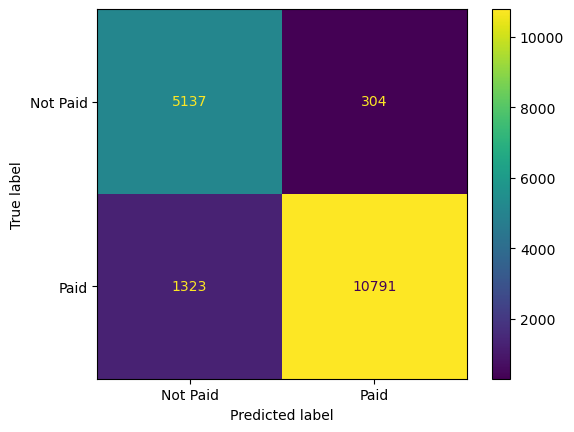

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Paid', 'Paid'])